## HW1: Linear Regression using Gradient Descent
In hw1, you need to implement linear regression by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get no points by simply calling sklearn.linear_model.LinearRegression

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## Load data

In [2]:
train_df = pd.read_csv("train_data.csv")
x_train, y_train = train_df['x_train'], train_df['y_train']

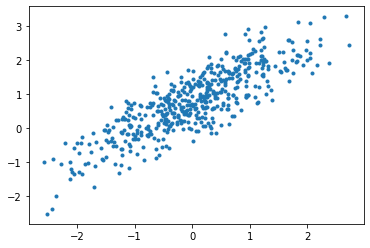

In [3]:
plt.plot(x_train, y_train, '.')

## Train your model 
### Pseudo code:
1. Random initialize the weights, intercepts of the linear model

**for i in range(iteration)**

    2. Feed foward the training data into the model, get the output prediction
    3. Calculating training loss by Mean Square Error of predcition and ground truth data
    4. Calculating the gradients
    5. Updating the weights and intercepts by the gradients * learning rate 
    
**End of training**

In [140]:
def gradient(x, y, w0, w1):
    # y = w0 + w1*x
    # loss function = sum((y - w0 - w1*x) ** 2) / 2n
    # gradient w0: mean(w0 + w1*x -y)
    # gradient w1: mean((w0 + w1*x -y) * x)

    res = w0 + w1*x - y
    return res.mean(), (res * x).mean() #return gradient of w0 and w1

def MSE_train(x_train, y_train, iterations=100, lr=1e-4):
    # select initial weight from normal distribution with mean=0 and standard deviation=0.5
    w0, w1 = np.random.normal(0,0.5,2)
    loss = np.zeros((iterations,))
    
    for iter in range(iterations):
        y_pred = w0 + w1*x_train

        # loss function = sum((y - w0 - w1*x) ** 2) / 2n
        loss[iter] = np.sum((y_train - y_pred)**2) / (2*len(y_train))

        # calculate the gradient of w0 and w1
        diff = -lr * np.array(gradient(x_train, y_train, w0, w1))
        
        # update weights
        w0 += diff[0]
        w1 += diff[1]
    
    return w0, w1, loss

# With several experiments, set iterations=3000 and learning rate=0.001 can get the better result
w0, w1, loss = MSE_train(x_train, y_train, iterations=3000, lr=1e-3)

## Test the performance on the testing data
Inference the test data (x_test) by your model and calculate the MSE of (y_test, y_pred)

In [110]:
test_data = pd.read_csv("test_data.csv")
x_test, y_test = test_data['x_test'], test_data['y_test']

In [134]:
def model(w0, w1, x):
    return w0 + w1*x

# Visualize learning curve with loss array
def loss_fig(loss):
    plt.title("training loss")
    plt.xlabel("iterations")
    plt.ylabel("loss")
    plt.plot(loss, linewidth=4, color='red')
    plt.show()
    
# Visualize predicted result
def pred_fig(x, y, pred_y, title):
    plt.title(title)
    plt.scatter(x, y, s=20, color='blue')
    plt.plot(x, pred_y, color='red', linewidth=4)
    plt.show()

In [141]:
y_pred = model(w0, w1, x_test)

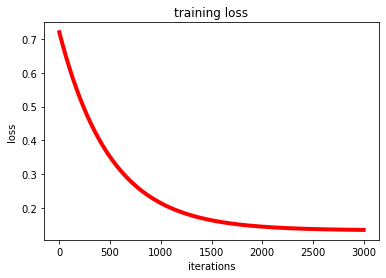

MSE: 0.07743586415658182
intercepts(w0): 0.7727116410831288
weights(w1): 0.7632747638121572


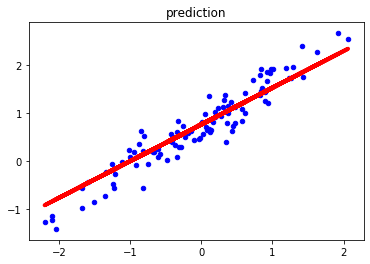

In [142]:
# Q1. Plot the learning curve of the training
loss_fig(loss)

# Q2. Mean Square Error of your prediction and ground truth
mse = np.mean((y_pred-y_test)**2)
print(f'MSE: {mse}')

# Q3. weights and intercepts of the linear model
print(f'intercepts(w0): {w0}')
print(f'weights(w1): {w1}')

# Visualize prediction with y_test
pred_fig(x_test, y_test, y_pred, "prediction")